 # California Housing 회귀 분석 캡스톤

우리가 집을 살 때 보는 가격은 정말로 “공정한” 가격일까?
1990년 캘리포니아 인구조사 기반 데이터를 보면, 같은 지역이어도 가구 소득에 따라 집값이 얼마나 달라질까? 

집의 나이, 방의 수, 인구밀도는 정말 중요할까?

이번 캡스톤 과제에서는 California Housing 데이터셋을 활용하여 지리적 위치·가구 소득·주택 특성이 주택 중위 가격을 어떤 구조로 설명하는지를 데이터와 회귀모형을 통해 단계적으로 탐구합니다.

이 과제의 목표는 예측 정확도를 높이는 것이 아니라, “캘리포니아 주택 가격은 어떤 논리와 불평등으로 형성되는가”를
수치와 언어로 설명하는 것입니다.

### 라이브러리 참조

In [1]:
# 라이브러리 기본 참조
from hossam import load_data
from pandas import DataFrame
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
import numpy as np
from pandas.api.types import CategoricalDtype
import pandas as pd
from scipy.stats import t, normaltest, bartlett, levene, ttest_ind
import pingouin as pg

# 선형회귀를 위한 참조
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 결과 검정을 위한 참조
from statsmodels.stats.diagnostic import linear_reset
from scipy.stats import zscore, probplot, shapiro, anderson
from statsmodels.stats.api import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson


# VIF값을 계산하기 위한 참조
from statsmodels.stats.outliers_influence import variance_inflation_factor


from statannotations.Annotator import Annotator

# 로지스틱을 위한 참조
import statsmodels.api as sm

from hossam import load_data
from pandas import melt, DataFrame
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
from math import sqrt


from sklearn.preprocessing import RobustScaler

# 로지스틱 결과 판별을 위한 참조
# → 머신러닝 라이브러리를 미리 사용
from sklearn.metrics import (
    confusion_matrix,
    roc_curve,
    roc_auc_score,
    accuracy_score,
    recall_score,
    precision_score,
    f1_score
)



# 가정 확인을 위한 라이브러리
from scipy.stats import t, normaltest, bartlett, levene


# 분산분석을 위한 라이브러리
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from pingouin import anova
from pingouin import welch_anova


# 사후검정을 위한 라이브러리
from pingouin import pairwise_tukey, pairwise_tests, pairwise_gameshowell



import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_reset
from scipy.stats import zscore, pearsonr, spearmanr

### 데이터 불러오기

In [2]:
origin = load_data('california_housing')

print("\n==== 데이터 크기 확인 ====")
print(f"데이터셋 크기: {origin.shape}")
print(f"열 개수: {origin.shape[1]}")
print(f"행 개수: {origin.shape[0]}")

print("\n==== 타입확인 ====")
print(origin.info())


[data] https://data.hossam.kr/data/kaggle/california_housing.xlsx
[desc] 1990년 미국 인구조사(Census)를 기반으로 캘리포니아 각 지역의 인구·주택·소득 특성과 주택 중위가격을 담아, 회귀 분석과 머신러닝 모델 실습에 널리 사용되는 대표적인 주택 가격 데이터 (출처: https://www.kaggle.com/datasets/camnugent/california-housing-prices)

field               description
------------------  ------------------------------------------------------------------------------
longitude           경도(Longitude). 서경(–값) 기준.
latitude            위도(Latitude). 북위(+) 기준.
housing_median_age  해당 구역(블록 그룹)의 주택 중위 연령(년).
total_rooms         구역 내 모든 주택의 총 방(room) 수 합계.
total_bedrooms      구역 내 모든 주택의 총 침실(bedroom) 수 합계.
population          구역의 전체 인구 수.
households          구역의 전체 “가구 수”(living units).
median_income       구역의 중위 소득(median income), 단위는 약 1 = $10,000 수준.
median_house_value  주택 중위가격(달러). 회귀의 목표변수(타깃).
ocean_proximity     해안과의 거리/접근성 범주: <1H OCEAN, INLAND, NEAR BAY, NEAR OCEAN, ISLAND 등.


==== 데이터 크기 확인 ====
데이터셋 크기: (20640, 10)
열 개수: 10
행 개수: 20640

==== 타입확인 ====
<class 'pand

In [3]:
origin.head(100)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
95,-122.26,37.80,36,5329,2477.0,3469,2323,2.0096,130000,NEAR BAY
96,-122.26,37.82,31,4596,1331.0,2048,1180,2.8345,183800,NEAR BAY
97,-122.26,37.81,29,335,107.0,202,91,2.0062,125000,NEAR BAY
98,-122.26,37.82,22,3682,1270.0,2024,1250,1.2185,170000,NEAR BAY


### 미션 1. 이 데이터는 믿을만 할까?

1. 결측·이상치·편향을 점검하고, 처리 기준을 제시한다.
2. MedHouseValue가 0이거나 극단값인지, MedInc/HouseAge/AveRooms 등 주요 변수의 범위가 현실적인지 확인한다.

3. 1940년 이전 건축 주택이 52로 코딩되는 이유를 이해하고, 분석에 미칠 영향을 검토한다.
4. 전처리 전·후가 어떻게 달라졌는지 한눈에 비교하는 표나 요약을 만든다.
 
* MedHouseValue는 실제 달러 단위입니다. 1990년 명목가를 참고해 현실성을 평가하세요.

#### 결측치/이상치/편향 점검

1. 파생변수 추가 생성

| 변수명 (Variable) | 계산 수식 (Formula) | 생성 의도 및 의미 (Description) |
| :--- | :--- | :--- |
| **`rooms_per_household`**<br>(가구당 평균 방 개수) | `total_rooms` / `households` | **주택의 규모(Size) 파악**<br>단순 방 개수가 아닌, 한 가구가 사용하는 평균적인 방의 개수를 통해 집의 평수를 가늠 |
| **`population_per_household`**<br>(가구당 평균 인원수) | `population` / `households` | **거주 밀도(Density) 파악**<br>한 집에 몇 명이 사는지를 파악하여 1인 가구 지역인지, 다인 가구 밀집 지역인지 확인 |
| **`bedrooms_per_household`**<br>(가구당 평균 침실수) | `total_bedrooms` / `households` | **주택의 구조(Structure) 파악**<br>가구 당 침실이 차지하는 비중을 통해 일반 주거용인지, 특수 목적 시설인지 구분 |
| **`bedrooms_per_room`**<br>(방 하나당 침실 비율) | `total_bedrooms` / `total_rooms` | **주택의 구조(Structure) 파악**<br>전체 방 중 침실이 차지하는 비중을 통해 일반 주거용인지, 특수 목적 시설인지 구분 |


1. 파생변수 기반 데이터 추가 전처리
   
| 구분 | 제거 대상 / 조건 | 개수 (비중) | 제거 사유 (Reasoning) |
| :--- | :--- | :--- | :--- |
| **결측치**<br>(Missing Value) | `total_bedrooms` is **Null** | 207개 (약 1.0%) | **데이터 누락**<br>전체 데이터 대비 비중이 매우 작아, 중앙값 대치 대신 단순 삭제(`dropna`) 처리 |
| **이상치**<br>(Outlier 1) | `rooms_per_household` **$\ge$ 100** | 극소수 | **비정상적 규모**<br>한 가구에 방이 100개 이상인 경우는 호텔이나 기숙사 등 특수 시설로 의심됨 |
| **이상치**<br>(Outlier 2) | `bedrooms_per_room` **$\ge$ 0.8** | 극소수 | **구조적 오류**<br>집 전체 방의 80% 이상이 침실인 경우는 일반적인 주택 구조로 보기 힘든 기입 오류 가능성 |
| **이상치**<br>(Outlier 3) | `population_per_household` **$\ge$ 100** | 극소수 | **비정상적 밀도**<br>한 집에 30명 이상 거주하는 경우는 셰어하우스, 군부대나 수용 시설 등으로 판단되어 분석에서 제외 |

### 1940년 이전 건축 주택이 52로 코딩되는 이유를 이해하고, 분석에 미칠 영향을 검토한다.

1. 현상 및 원인: 히스토그램의 52 구간 급증은 데이터 수집 당시(1990년), 1940년 이전(50년 이상) 건축된 주택을 모두 52로 일괄 처리(Right-Censoring)했기 때문입니다.

2. 영향: 52년 된 집과 100년 된 고택을 구분할 수 없어, 건축 연도에 따른 세밀한 가격 차이를 반영하는 데 한계가 있습니다.

3. 조치 결과: 유지 (Keep)
타겟(집값)이 아닌 설명 변수이므로 왜곡 위험이 상대적으로 적다고 판단했습니다.
삭제 시 전체 데이터의 상당수가 유실되므로, 해당 값을 '오래된 주택 밀집 지역'을 나타내는 범주적 특성으로 이해하고 사용합니다.

In [4]:
empty = origin.isnull()
empty.sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
# 'total_bedrooms' 열이 비어있는(NaN) 행만 찾아서 제거합니다.
df_clean=origin.copy()
df_clean_complete = df_clean.dropna(subset=['total_bedrooms'])

# 제거 후 확인 (데이터 개수가 207개 줄었는지 확인)
print(f"제거 전: {len(origin)}개")
print(f"제거 후: {len(df_clean_complete)}개")

제거 전: 20640개
제거 후: 20433개


<추가 지표 생성>

In [6]:
df_add_new = df_clean_complete.copy()

# 파생 변수 생성 (Feature Engineering)
# 1. 가구당 방 개수 (Rooms per Household)
df_add_new['rooms_per_household'] = df_add_new['total_rooms'] / df_add_new['households']

# 2. 방 하나당 침실 개수 (Bedrooms per Room) 
df_add_new['bedrooms_per_room'] = df_add_new['total_bedrooms'] / df_add_new['total_rooms']

# 3. 가구당 인구수 (Population per Household)
df_add_new['population_per_household'] = df_add_new['population'] / df_add_new['households']


# 4. 가구당 침실 개수 (Bedrooms per Household)
df_add_new['bedrooms_per_household'] = df_add_new['total_bedrooms'] / df_add_new['households']



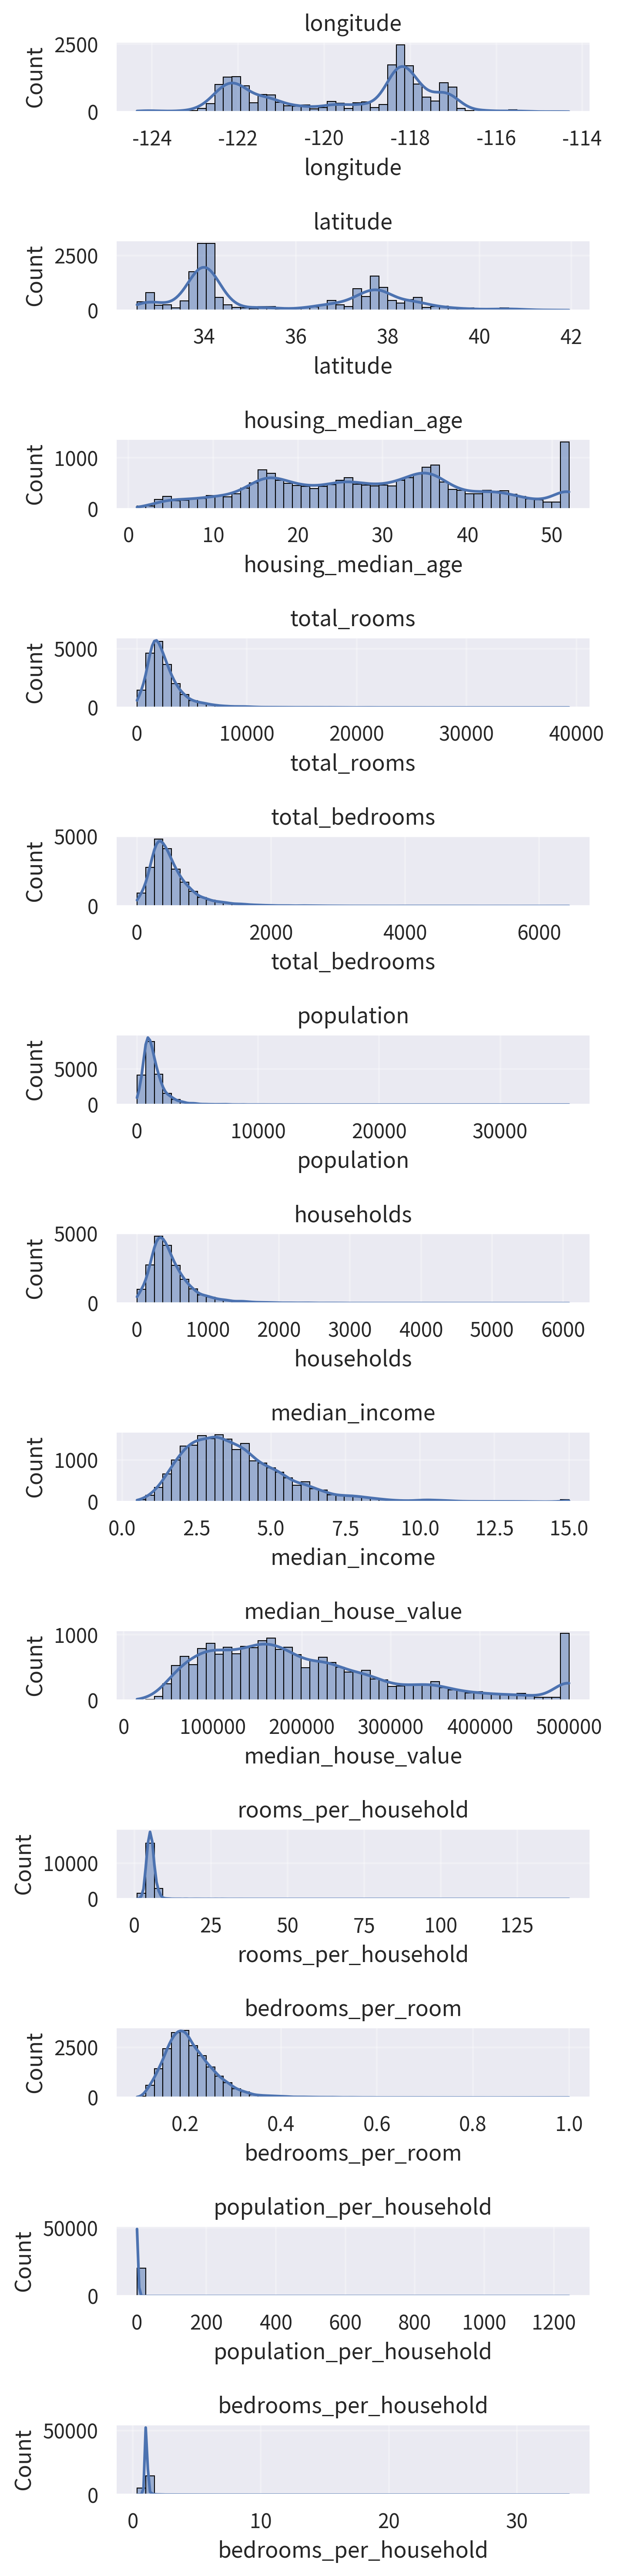

In [7]:
# 히스토그램으로 보고 싶은 컬럼 7개
cols_list = ["longitude", "latitude", "housing_median_age", "total_rooms",
             "total_bedrooms", "population", "households",'median_income','median_house_value','rooms_per_household','bedrooms_per_room','population_per_household','bedrooms_per_household']
my_dpi = 300
# 1) 그래프 초기화

width_px = 1500
height_px = 6000
rows = 13
cols = 1
figsize = (width_px / my_dpi, height_px / my_dpi)

fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) Histogram 그리기
for i, col in enumerate(cols_list):
    sb.histplot(
        data=df_add_new,
        x=col,
        bins=50,
        kde=True,
        edgecolor="#000000",
        linewidth=0.5,
        ax=ax[i]              # ⭐ 핵심
    )
    ax[i].set_title(col)
    ax[i].grid(alpha=0.3)

# 3) 출력
plt.tight_layout()
plt.savefig("plot.png", dpi=my_dpi * 2)
plt.show()
plt.close()


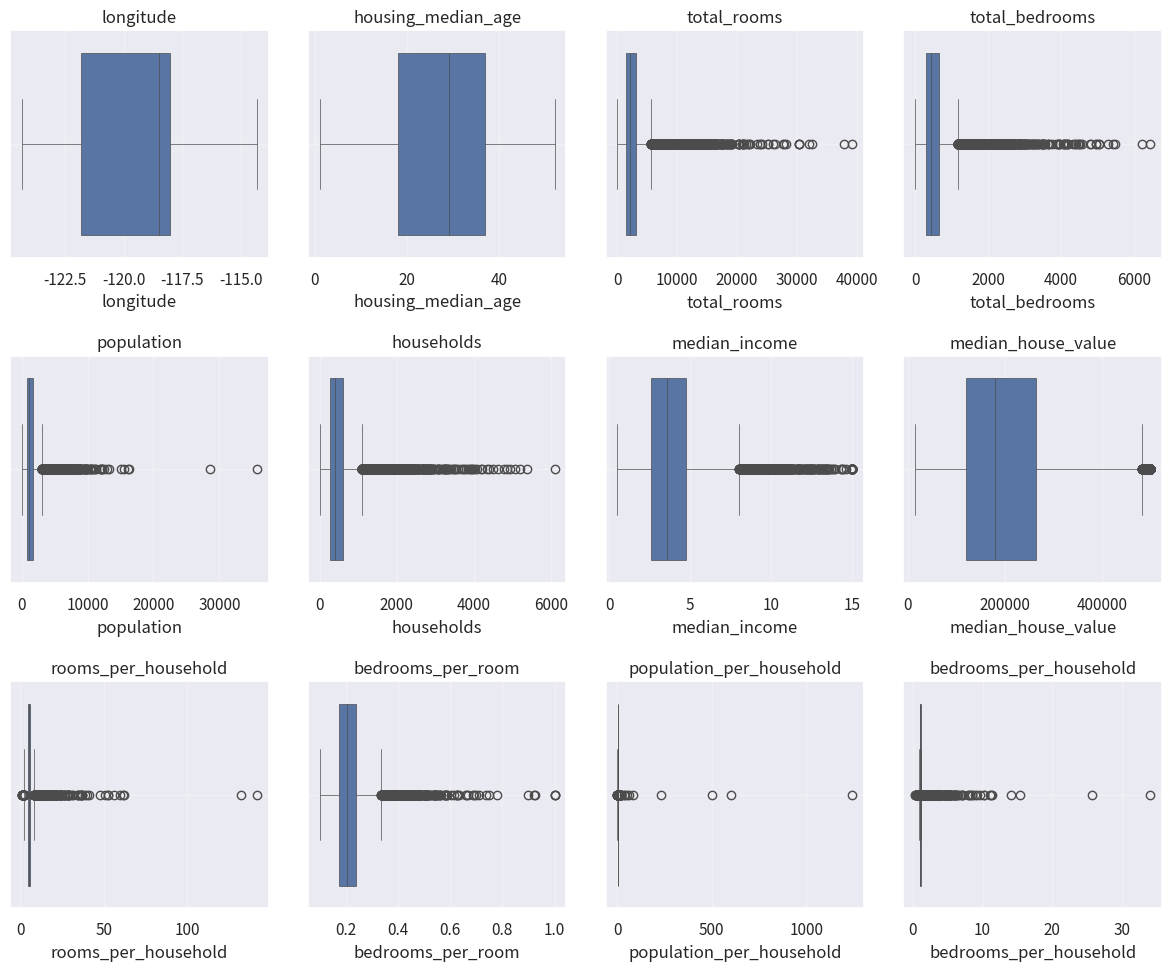

In [8]:
import matplotlib.pyplot as plt
import seaborn as sb

# 보고 싶은 컬럼 9개 (리스트에 9개가 들어있습니다)
cols_list = ["longitude", "housing_median_age", "total_rooms",
             "total_bedrooms", "population", "households",'median_income','median_house_value','rooms_per_household','bedrooms_per_room','population_per_household','bedrooms_per_household']

my_dpi = 100  # 모니터 확인용으로는 100~150 정도가 적당합니다.

# 1) 그래프 초기화 (3행 3열)
width_px = 1200
height_px = 1000
rows = 3
cols = 4
figsize = (width_px / my_dpi, height_px / my_dpi)

fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2D 배열인 ax를 1D로 펴주면 반복문 돌리기 편합니다.
axes_flat = ax.flatten()

# 2) Boxplot 그리기
for i, col in enumerate(cols_list):
    sb.boxplot(
        data=df_add_new, # 사용하시는 데이터프레임 이름
        x=col,
        linewidth=0.5,
        ax=axes_flat[i]       # ⭐ 핵심: 평평하게 펴진 축(axis) 사용
    )
    axes_flat[i].set_title(col, fontsize=12, fontweight='bold')
    axes_flat[i].grid(alpha=0.3)

# 3) 출력 및 여백 조정
plt.tight_layout()
plt.show()

In [9]:
df_add_new_ourlier_remove = df_add_new.copy()

# 1. 이상치 조건 정의 (제거 대상)
outlier_condition = (
    (df_add_new_ourlier_remove['rooms_per_household'] >= 50) |
    (df_add_new_ourlier_remove['bedrooms_per_room'] >= 0.8) |
    (df_add_new_ourlier_remove['population_per_household'] >= 30)
)

# 2. 몇 개나 되는지 확인
outlier_count = df_add_new_ourlier_remove[outlier_condition].shape[0]
print(f"제거될 이상치 데이터 개수: {outlier_count}개")

# 3. 이상치가 아닌 정상 데이터만 남기기 (~)
# 물결표(~)는 '반대(not)'를 의미합니다. 즉, 이상치가 '아닌' 것만 선택합니다.
df_remove_new = df_add_new_ourlier_remove[~outlier_condition].copy()

print(f"정제 후 남은 데이터 개수: {len(df_add_new_ourlier_remove)}개")

제거될 이상치 데이터 개수: 24개
정제 후 남은 데이터 개수: 20433개


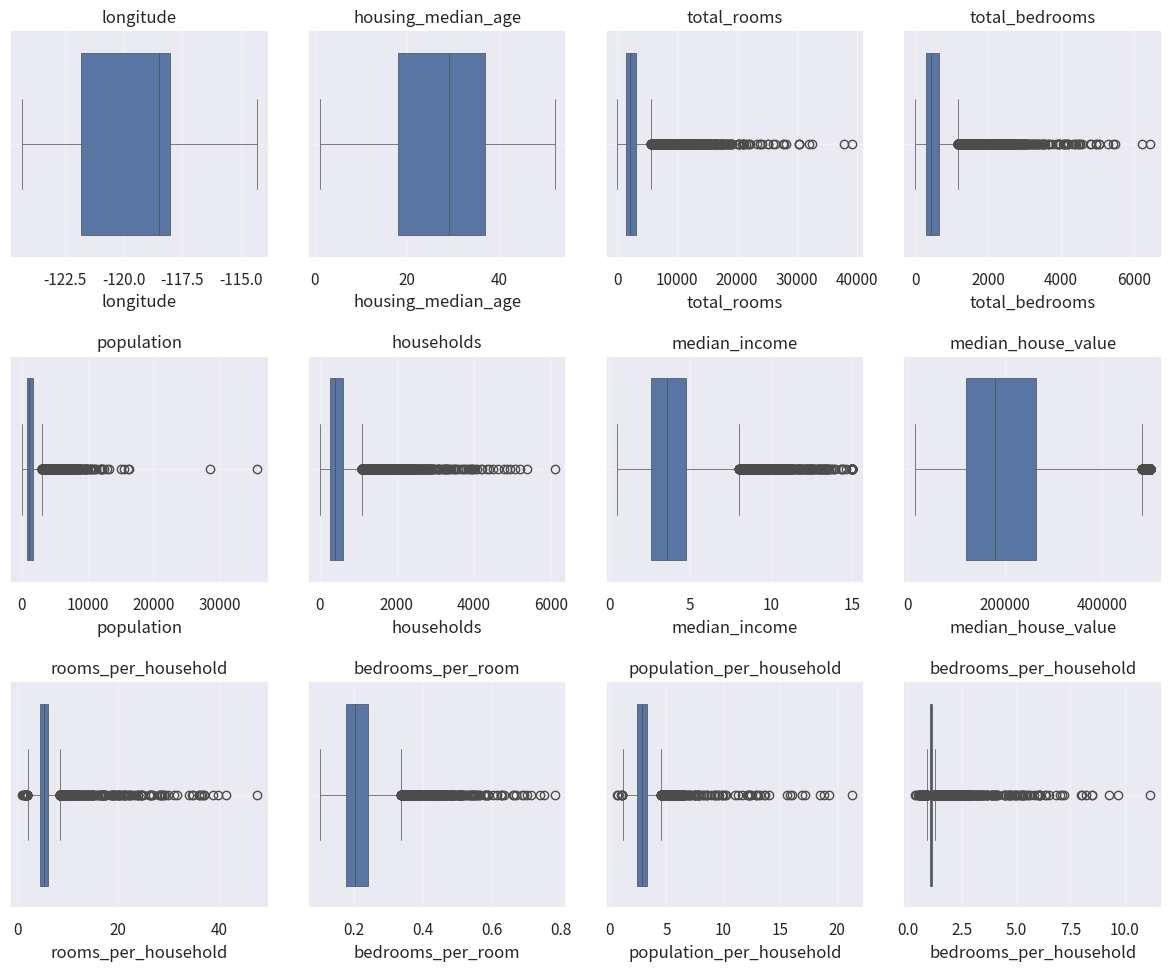

In [10]:
import matplotlib.pyplot as plt
import seaborn as sb

# 보고 싶은 컬럼 9개 (리스트에 9개가 들어있습니다)
cols_list = ["longitude", "housing_median_age", "total_rooms",
             "total_bedrooms", "population", "households",'median_income','median_house_value','rooms_per_household','bedrooms_per_room','population_per_household','bedrooms_per_household']

my_dpi = 100  # 모니터 확인용으로는 100~150 정도가 적당합니다.

# 1) 그래프 초기화 (3행 3열)
width_px = 1200
height_px = 1000
rows = 3
cols = 4
figsize = (width_px / my_dpi, height_px / my_dpi)

fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2D 배열인 ax를 1D로 펴주면 반복문 돌리기 편합니다.
axes_flat = ax.flatten()

# 2) Boxplot 그리기
for i, col in enumerate(cols_list):
    sb.boxplot(
        data=df_remove_new, # 사용하시는 데이터프레임 이름
        x=col,
        linewidth=0.5,
        ax=axes_flat[i]       # ⭐ 핵심: 평평하게 펴진 축(axis) 사용
    )
    axes_flat[i].set_title(col, fontsize=12, fontweight='bold')
    axes_flat[i].grid(alpha=0.3)

# 3) 출력 및 여백 조정
plt.tight_layout()
plt.show()

In [11]:
import pandas as pd

# 점검할 주요 변수들
cols_to_check = ['median_house_value', 'median_income', 'housing_median_age', 'rooms_per_household']

print("=== 1. 기초 통계량 확인 (Min/Max에 주목하세요) ===")
# .T를 붙이면 행/열이 바뀌어 보기가 더 편합니다.
display(df_remove_new[cols_to_check].describe().T)

print("\n=== 2. 집값(MedHouseValue) 정밀 점검 ===")
# 집값이 0원인 데이터가 있는지 확인
zero_price_count = df_remove_new[df_remove_new['median_house_value'] == 0].shape[0]
print(f"집값이 0인 데이터 개수: {zero_price_count}개")

# 집값이 비정상적으로 싼 경우 (예: $10,000 미만) 확인
cheap_houses = df_remove_new[df_remove_new['median_house_value'] < 10000]
print(f"집값이 $10,000 미만인 데이터 개수: {len(cheap_houses)}개")

if len(cheap_houses) > 0:
    print("-> 너무 싼 집이 존재합니다. 데이터를 눈으로 확인해보세요:")
    display(cheap_houses.head())

=== 1. 기초 통계량 확인 (Min/Max에 주목하세요) ===


,count,mean,std,min,25%,50%,75%,max
median_house_value,20409.0,206853.714097,115413.297905,14999.000000,119400.00000,179800.000000,264700.000000,500001.000000
median_income,20409.0,3.871231,1.898640,0.499900,2.56400,3.536400,4.744000,15.000100
housing_median_age,20409.0,28.632515,12.588051,1.000000,18.00000,29.000000,37.000000,52.000000
rooms_per_household,20409.0,5.401669,1.884977,0.888889,4.44186,5.230635,6.051641,47.515152



=== 2. 집값(MedHouseValue) 정밀 점검 ===
집값이 0인 데이터 개수: 0개
집값이 $10,000 미만인 데이터 개수: 0개


### 미션 2. 가격과 핵심 변수의 첫 인상

1. MedHouseValue, MedInc, HouseAge, AveRooms 분포를 히스토그램/KDE로 확인하고 알 수 있는 객관적 사실을 서술한다.

2. 왜도/이상치가 회귀에 줄 수 있는 영향과 변환(로그 등)의 필요성이 있는지 서술하시오.

3. 분포 비교는 동일 축 스케일로 제시하고, 평균/중앙값/꼬리의 차이를 문장으로 요약하세요.

4. 지역별(Latitude/Longitude) 편향이나 시계열 문제(1990년 데이터만)가 해석에 미치는 영향을 짧게 언급하세요.

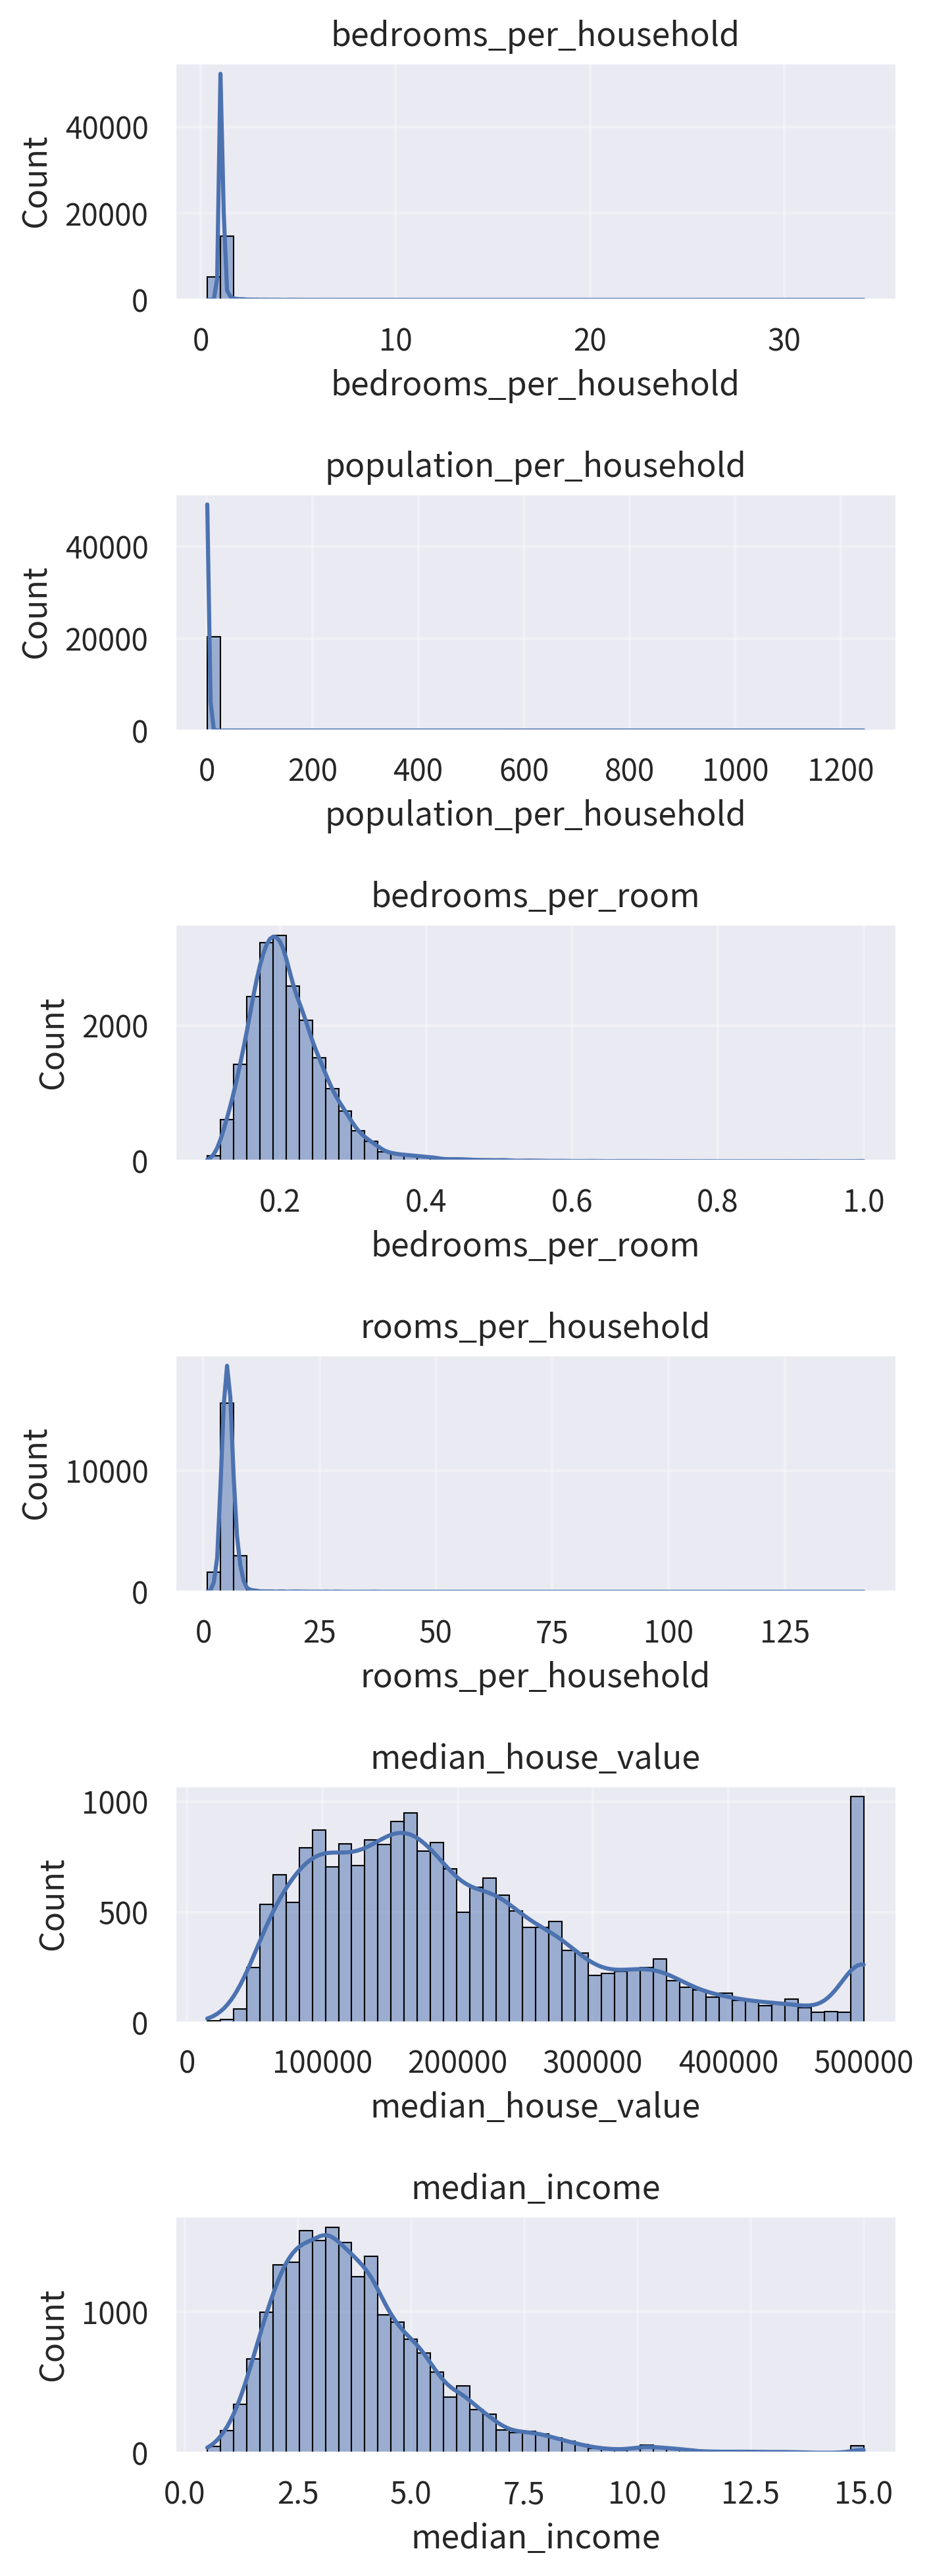

In [12]:
# 히스토그램으로 보고 싶은 컬럼 
cols_list = ['bedrooms_per_household','population_per_household','bedrooms_per_room','rooms_per_household','median_house_value','median_income']
my_dpi = 300
# 1) 그래프 초기화

width_px = 1500
height_px = 4000
rows = 6
cols = 1
figsize = (width_px / my_dpi, height_px / my_dpi)

fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) Histogram 그리기
for i, col in enumerate(cols_list):
    sb.histplot(
        data=df_add_new_ourlier_remove,
        x=col,
        bins=50,
        kde=True,
        edgecolor="#000000",
        linewidth=0.5,
        ax=ax[i]              # ⭐ 핵심
    )
    ax[i].set_title(col)
    ax[i].grid(alpha=0.3)

# 3) 출력
plt.tight_layout()
plt.savefig("plot.png", dpi=my_dpi * 2)
plt.show()
plt.close()


- 스케일링

In [13]:

# robustb_df = df_add_new_ourlier_remove.copy()

# cols = [
#     "housing_median_age", "total_rooms", "total_bedrooms",
#     "population", "households", "median_income", "median_house_value",
#     "rooms_per_household", "bedrooms_per_room",
#     "population_per_household", "bedrooms_per_household"
# ]

# scaler = RobustScaler()
# robustb_df[cols] = scaler.fit_transform(robustb_df[cols])

# robustb_df.head()


## 미션 3. 로그/비선형 변환을 고민해보자
- MedHouseValue 혹은 주요 변수(MedInc, Population, HouseAge)에 로그/제곱근 등 변환을 적용한 전후 분포를 나란히 비교한다.
- 변환이 해석과 모델 적합에 주는 장단점, 해석이 어떻게 달라지는지 예상한다.
- “이 변환이 없으면 어떤 함정에 빠질까?”를 한 줄로 정리한다.
- 선택 기준을 명시하세요: 왜 log(MedHouseValue)인지, 왜 Population에 로그인지 등 데이터 분포 근거로 설명합니다.

In [14]:
import numpy as np

df_log = df_add_new_ourlier_remove.copy()

log_cols = [
    "housing_median_age", "total_rooms", "total_bedrooms",
    "population", "households", "median_income", "median_house_value",
    "rooms_per_household", "bedrooms_per_room",
    "population_per_household", "bedrooms_per_household"
]

for col in log_cols:
    df_log[f'log_{col}'] = np.log1p(df_log[col])

df_log.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,...,log_total_rooms,log_total_bedrooms,log_population,log_households,log_median_income,log_median_house_value,log_rooms_per_household,log_bedrooms_per_room,log_population_per_household,log_bedrooms_per_household
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,...,6.781058,4.867534,5.777652,4.844187,2.232720,13.022766,2.077455,0.136793,1.268511,0.704982
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,...,8.867850,7.009409,7.784057,7.037906,2.230165,12.789687,1.979364,0.144790,1.134572,0.678988
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,...,7.291656,5.252273,6.208590,5.181784,2.111110,12.771673,2.228738,0.121789,1.335596,0.729212
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,...,7.150701,5.463832,6.326149,5.393628,1.893579,12.740520,1.919471,0.169286,1.266369,0.729025
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,...,7.395108,5.638355,6.338594,5.560682,1.578195,12.743154,1.985385,0.158793,1.157342,0.732888


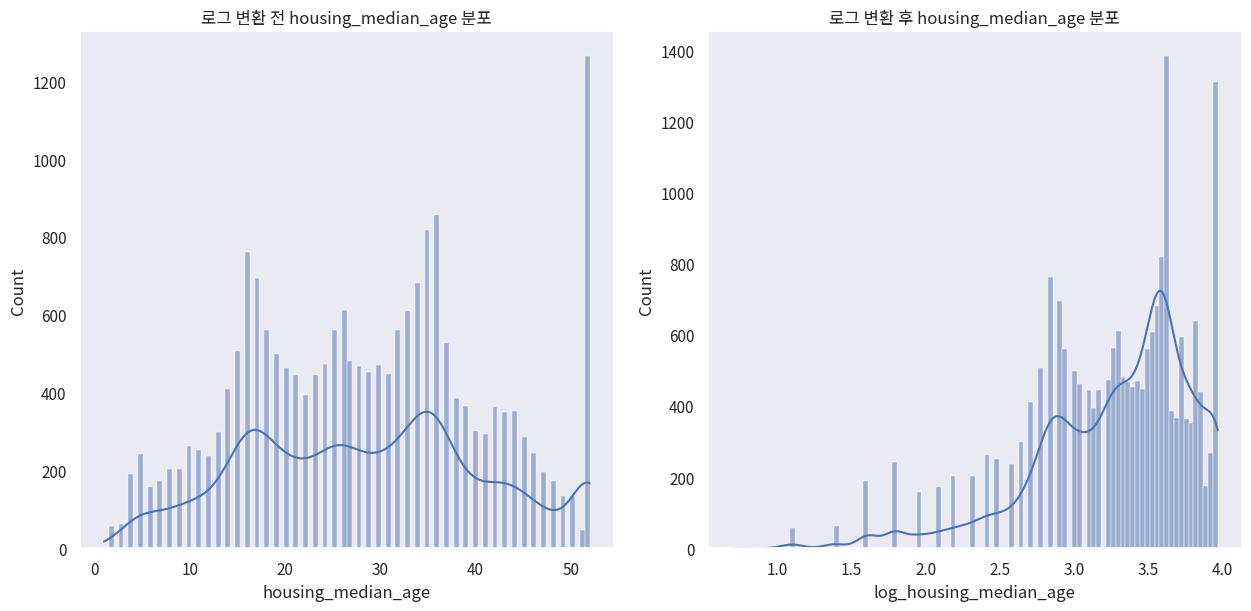

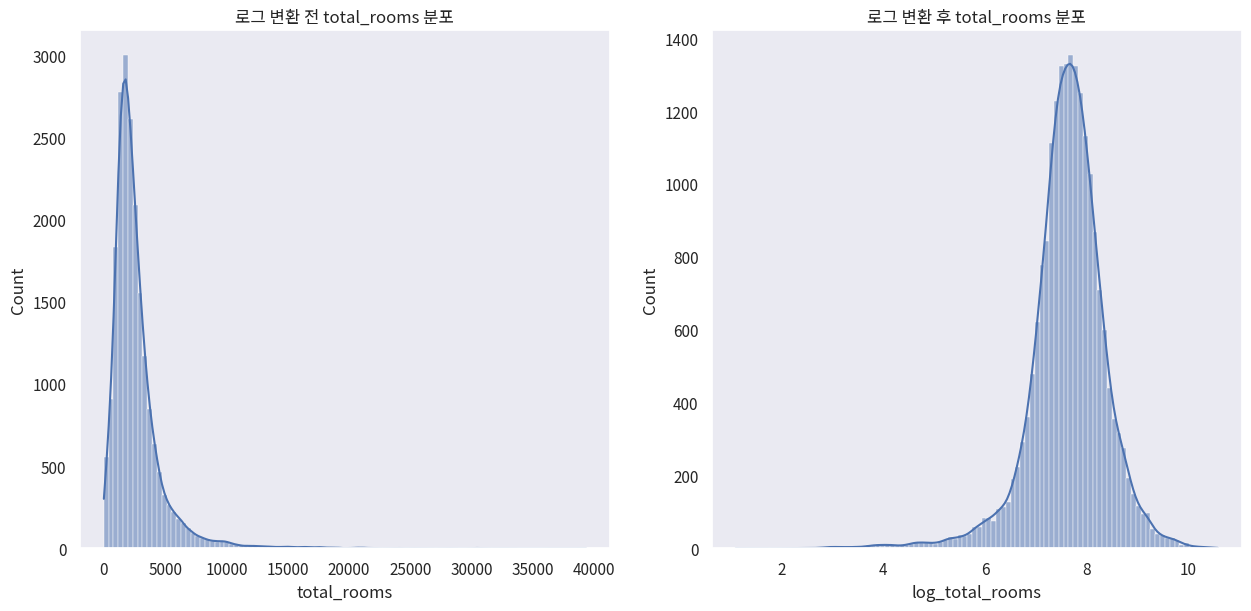

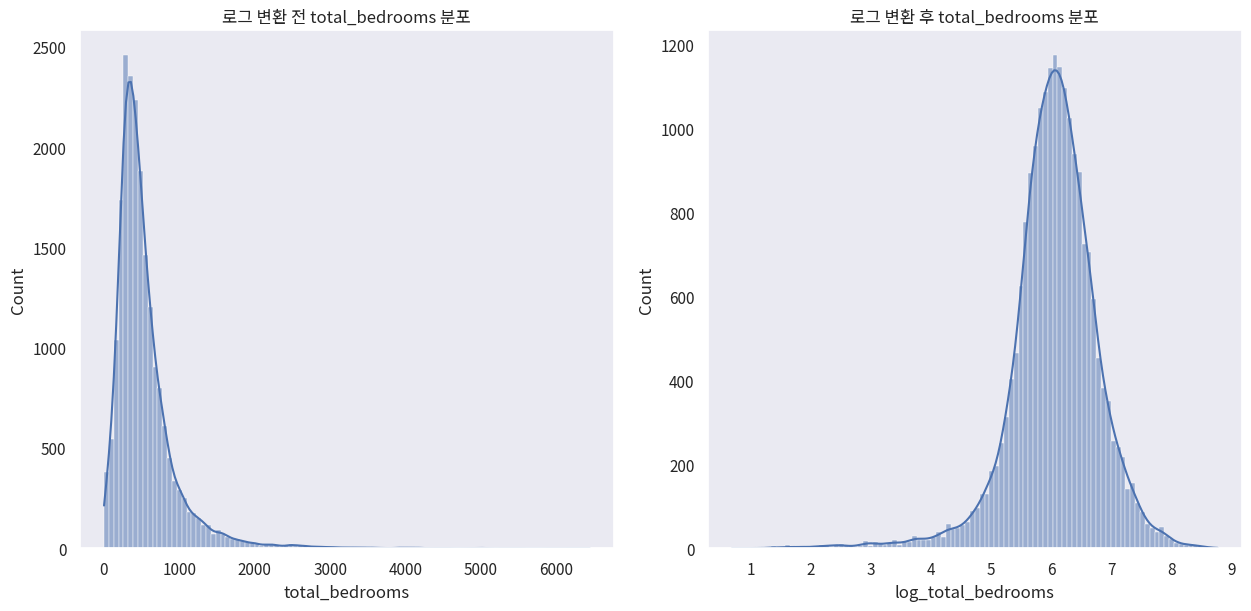

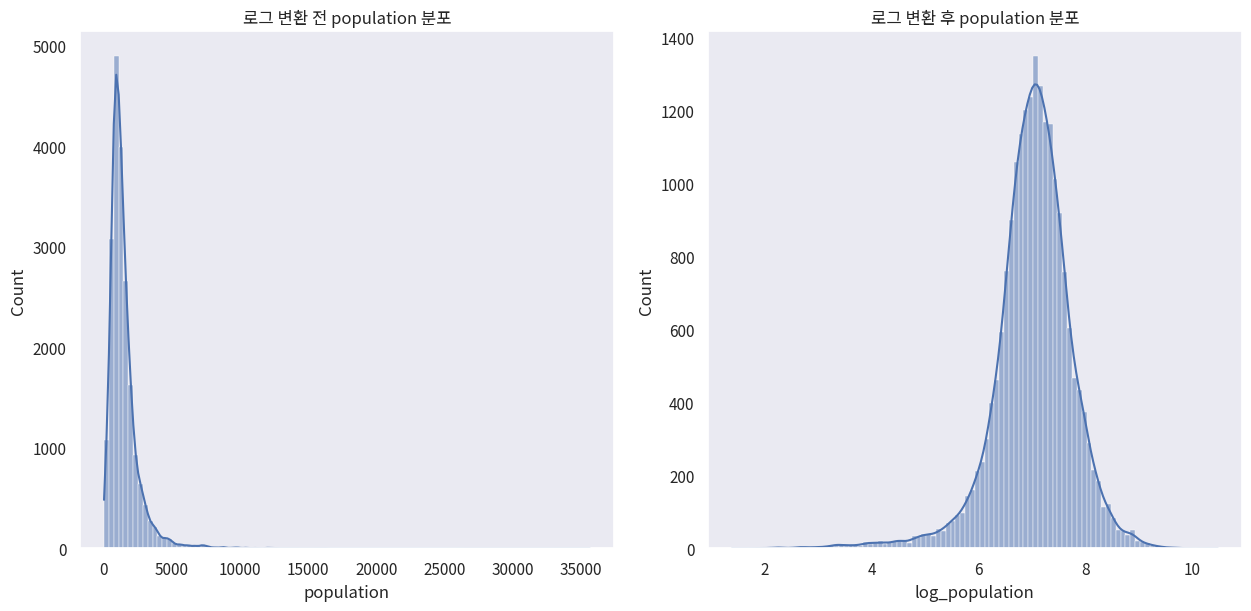

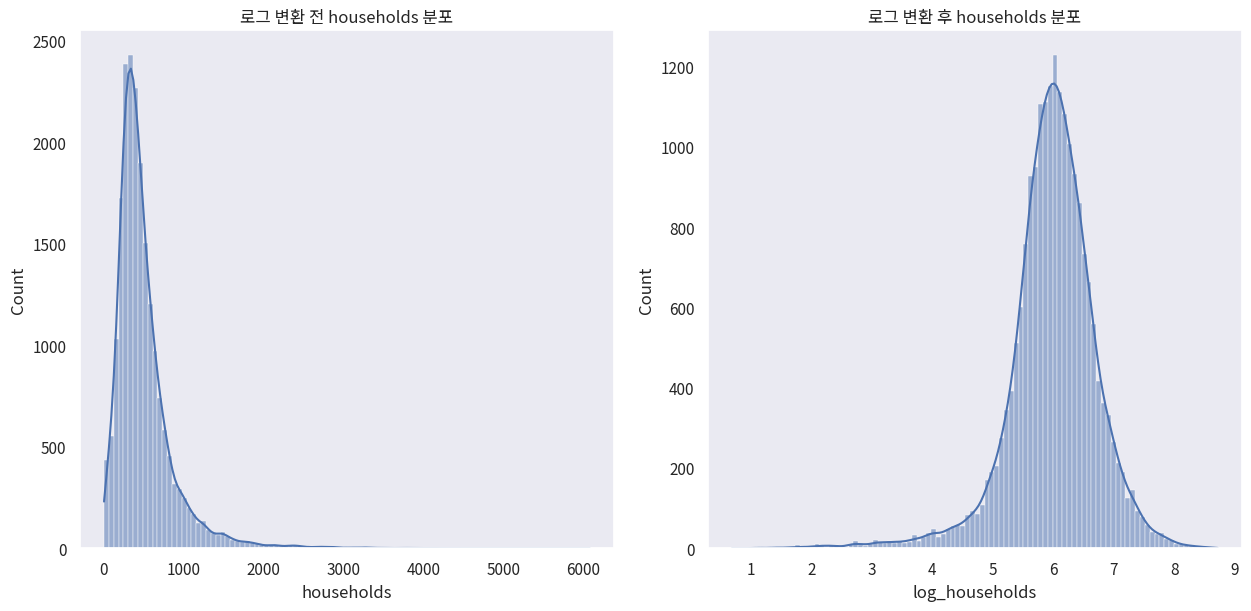

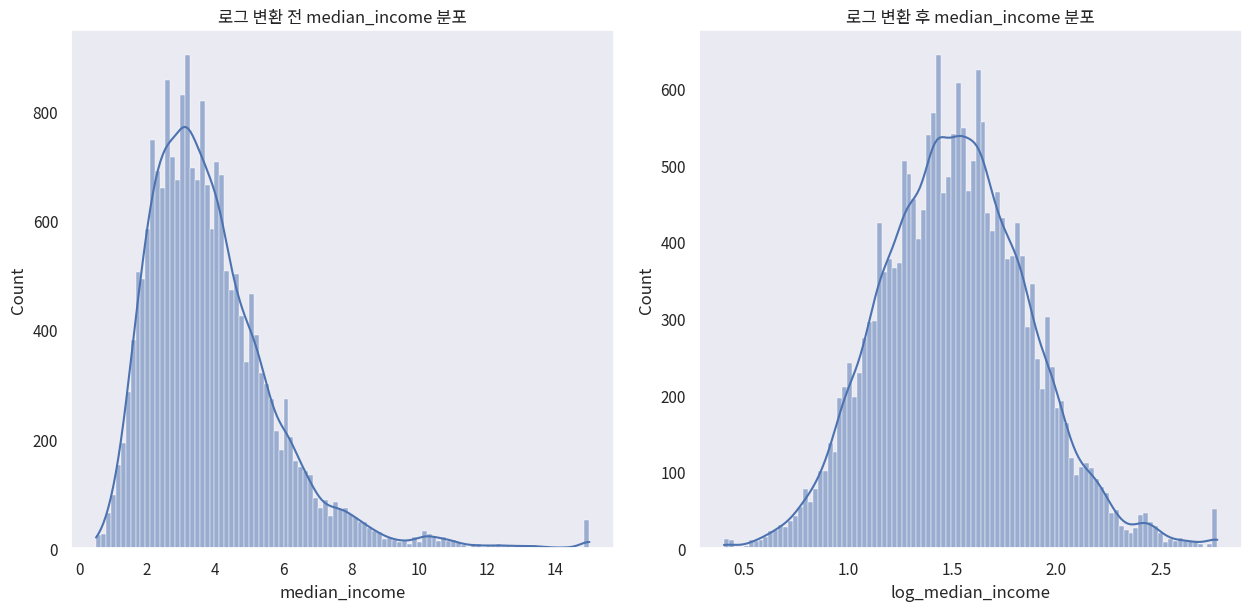

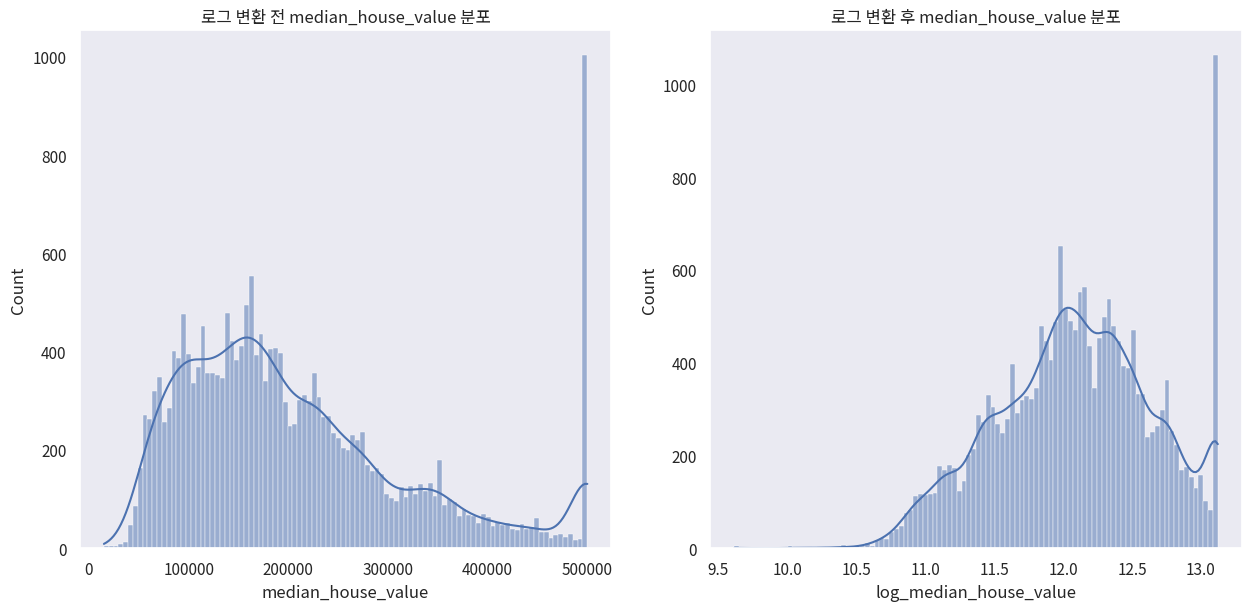

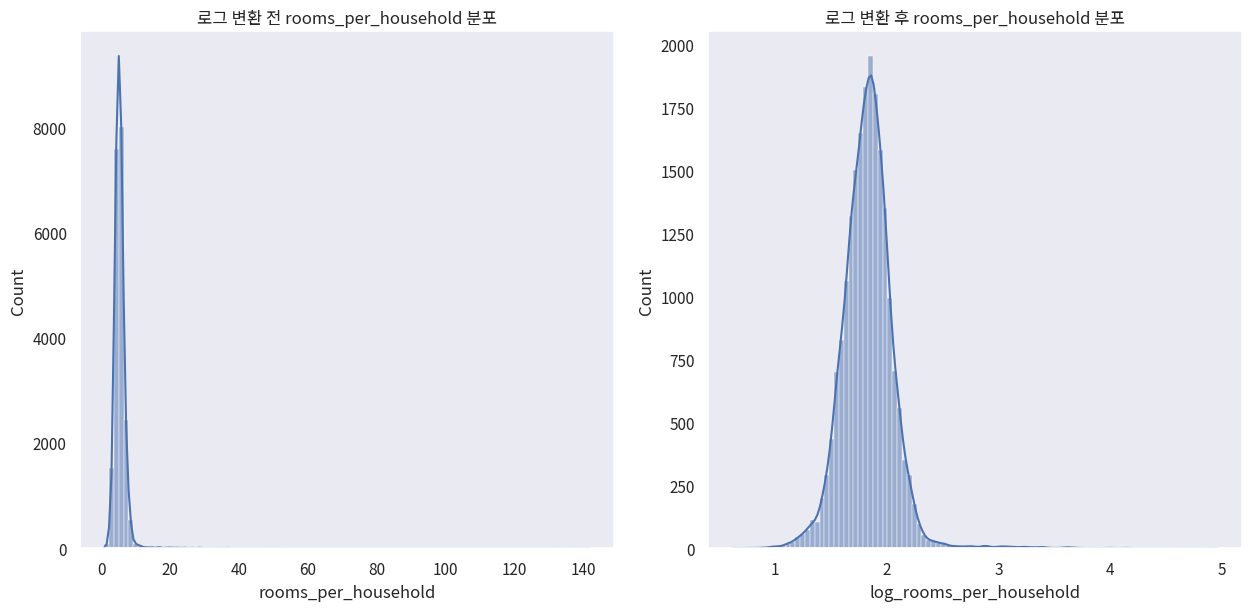

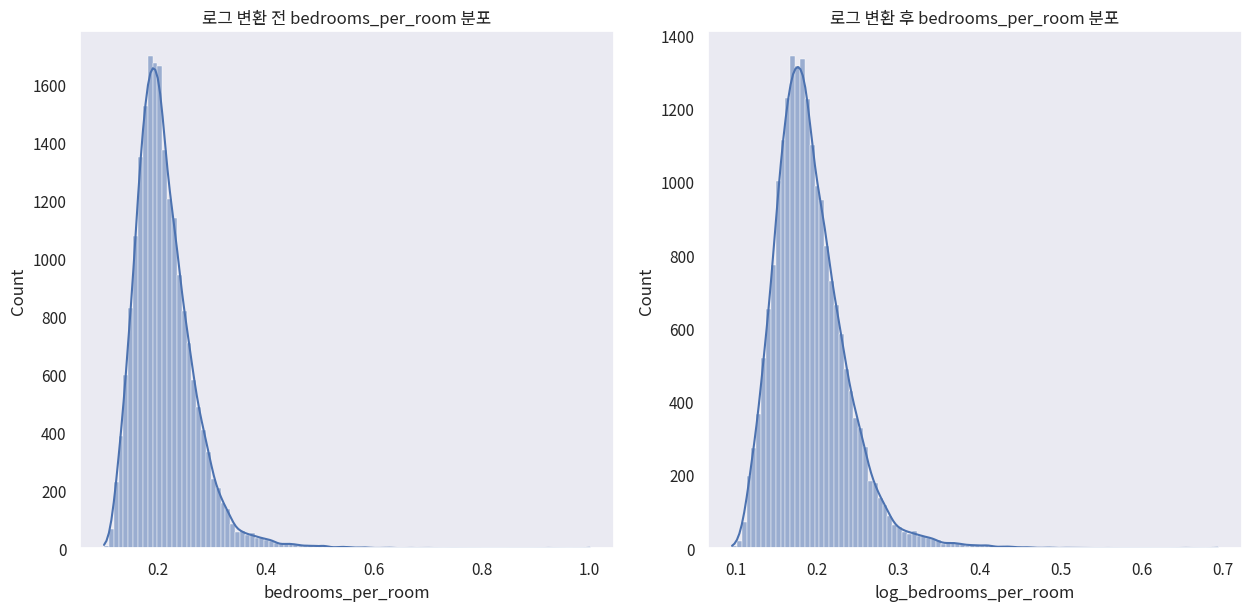

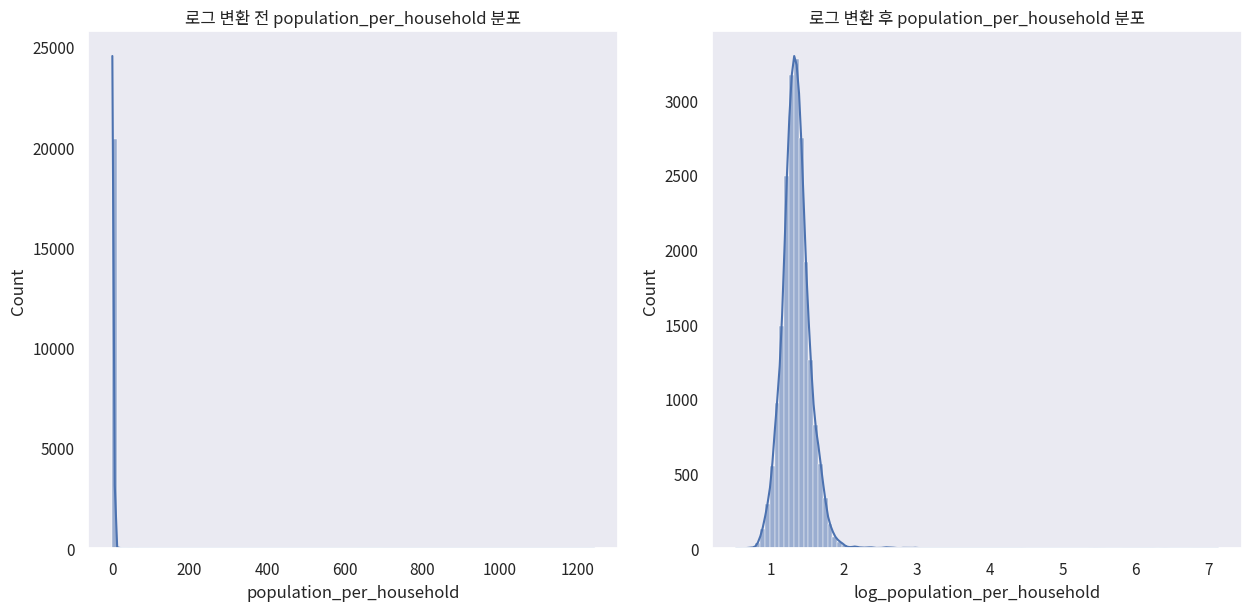

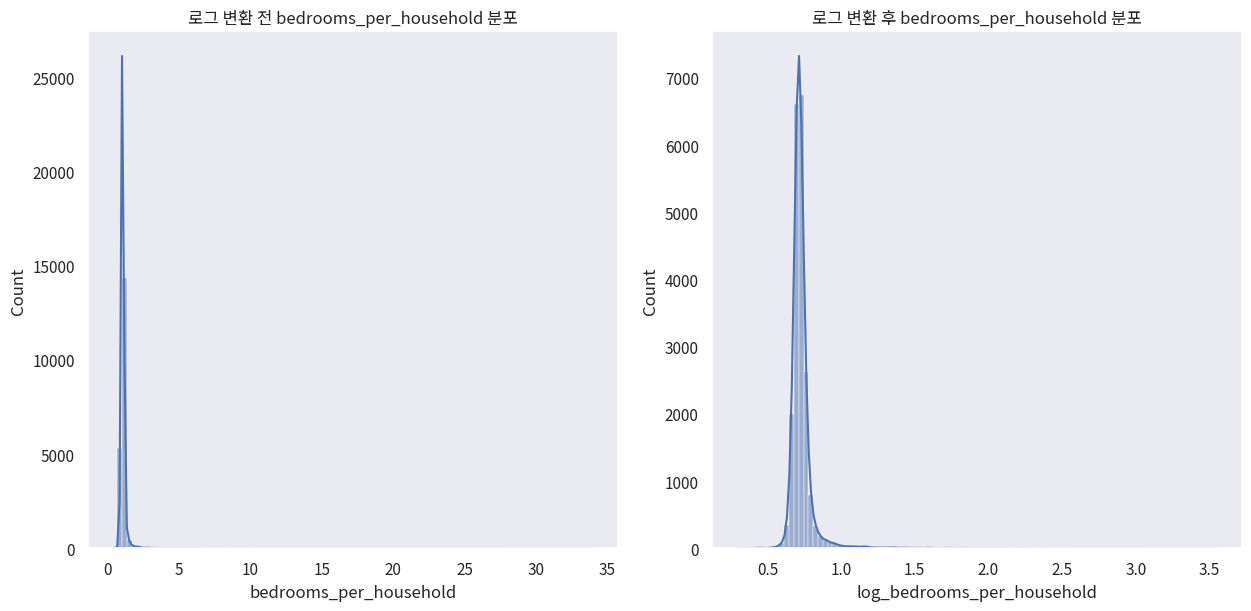

In [15]:
import matplotlib.pyplot as plt
import seaborn as sb

log_cols = [
    "housing_median_age", "total_rooms", "total_bedrooms",
    "population", "households", "median_income", "median_house_value",
    "rooms_per_household", "bedrooms_per_room",
    "population_per_household", "bedrooms_per_household"
]

my_dpi = 100

for col in log_cols:
    
    # 1️⃣ 그래프 초기화
    width_px = 1280
    height_px = 640
    figsize = (width_px / my_dpi, height_px / my_dpi)

    fig, ax = plt.subplots(1, 2, figsize=figsize, dpi=my_dpi)

    # 2️⃣ 그래프 그리기
    sb.histplot(
        data=df_add_new_ourlier_remove[col],
        bins=100,
        kde=True,
        ax=ax[0]
    )
    
    sb.histplot(
        data=df_log[f'log_{col}'],
        bins=100,
        kde=True,
        ax=ax[1]
    )

    ax[0].set_title(f'로그 변환 전 {col} 분포')
    ax[1].set_title(f'로그 변환 후 {col} 분포')

    # 3️⃣ 출력
    plt.tight_layout()
    plt.show()
    plt.close()


## 미션 4. 지리적 위치는 정말 중요할까?
- 위도(Latitude)와 경도(Longitude)를 활용한 지리적 시각화를 수행한다.
- 산점도(경도 × 위도, 점의 색상 = MedHouseValue)를 그려 주택 가격의 지리적 불평등을 관찰한다.
- “어느 지역에 비싼가?”, “가격 차이가 얼마나 뚜렷한가?”를 데이터 기반으로 설명하세요.
- 위도/경도가 개별 변수보다 지역 특성(Proxy)라는 점을 인식하고, 이것이 회귀에 주는 의미를 논의하세요.

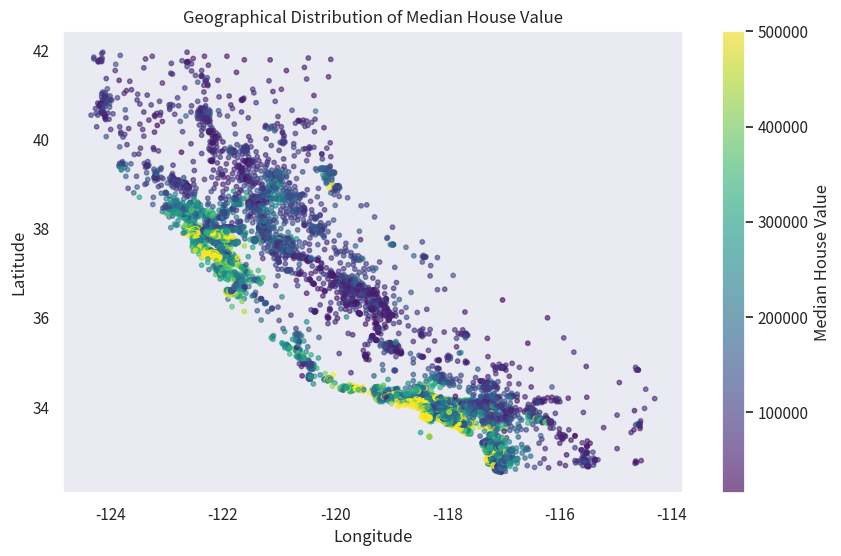

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

sc = plt.scatter(
    df_add_new_ourlier_remove['longitude'],
    df_add_new_ourlier_remove['latitude'],
    c=df_add_new_ourlier_remove['median_house_value'],
    cmap='viridis',
    s=10,
    alpha=0.6
)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Median House Value')

plt.colorbar(sc, label='Median House Value')
plt.show()


## 미션5. 소득은 정말로 집값을 결정할까
- MedInc(중위 가구 소득)에 따라 MedHouseValue가 달라진 시각화하고, 선형성과 강도를 평가한다.
- 산점도와 함께 회귀선을 그려 관계의 형태를 관찰하세요.
- 상관계수(Pearson)를 계산하고, “정말로 소득이 집값의 주 결정 요인인가?”를 비판적으로 생각해 보자.
- 소득 수준에 따른 주택가격 불평등 문제를 해석 관점에서 논의하세요.

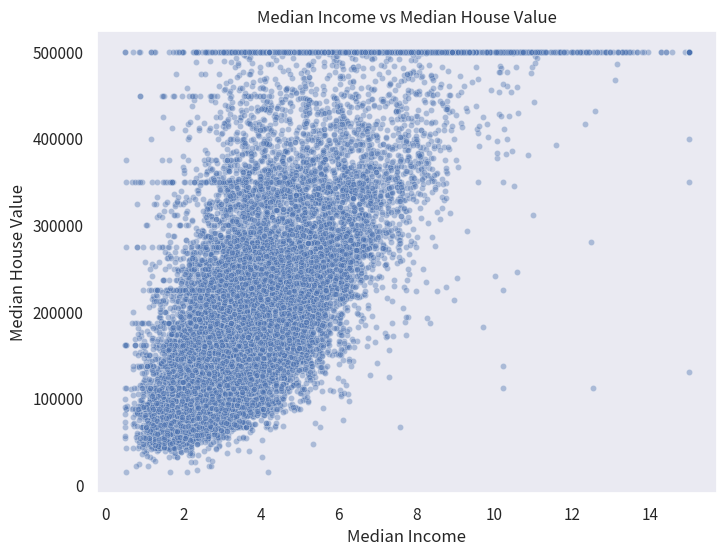

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))

sns.scatterplot(
    data=df_add_new_ourlier_remove,
    x='median_income',
    y='median_house_value',
    alpha=0.4,
    s=20
)

plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Median Income vs Median House Value')

plt.show()


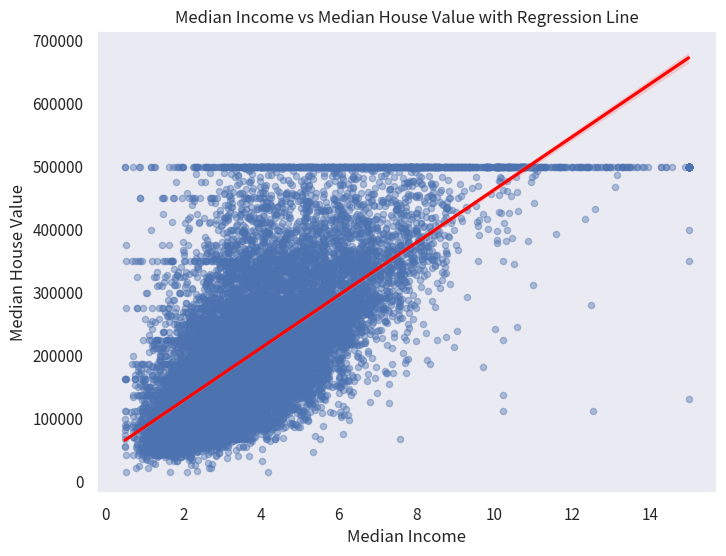

In [18]:
plt.figure(figsize=(8, 6))

sns.regplot(
    data=df_add_new_ourlier_remove,
    x='median_income',
    y='median_house_value',
    scatter_kws={'alpha':0.4, 's':20},
    line_kws={'color':'red'}
)

plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Median Income vs Median House Value with Regression Line')

plt.show()


In [19]:
df_add_new_ourlier_remove[['median_income', 'median_house_value']].corr(method='pearson')



,median_income,median_house_value
median_income,1.000000,0.688355
median_house_value,0.688355,1.000000


In [20]:
from scipy.stats import pearsonr

corr, pval = pearsonr(
    df_add_new_ourlier_remove['median_income'],
    df_add_new_ourlier_remove['median_house_value']
)

corr, pval


(np.float64(0.6883554753161125), np.float64(0.0))

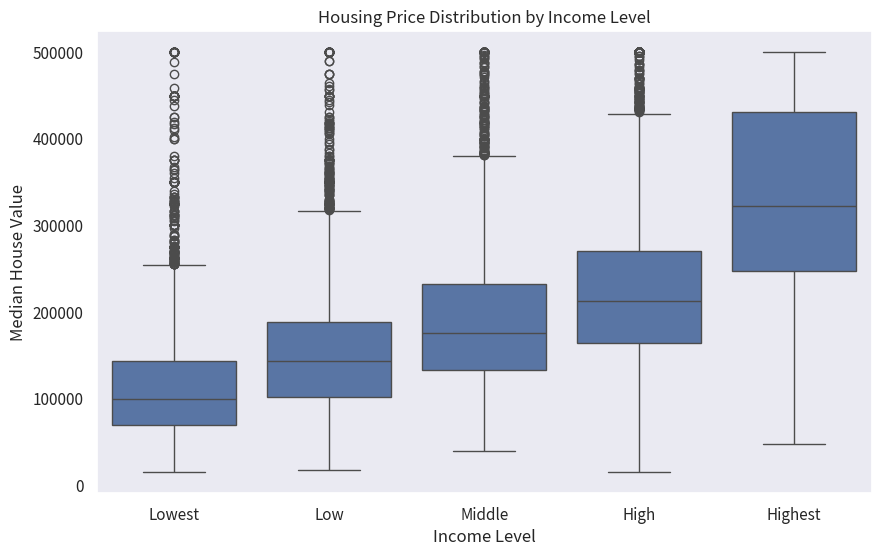

In [21]:
import pandas as pd

df_plot = df_add_new_ourlier_remove.copy()
df_plot['income_bin'] = pd.qcut(
    df_plot['median_income'],
    q=5,
    labels=['Lowest', 'Low', 'Middle', 'High', 'Highest']
)

plt.figure(figsize=(10, 6))

sns.boxplot(
    data=df_plot,
    x='income_bin',
    y='median_house_value'
)

plt.xlabel('Income Level')
plt.ylabel('Median House Value')
plt.title('Housing Price Distribution by Income Level')

plt.show()
